In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro   # Test de normalidad

from sklearn.pipeline import Pipeline   # Para aplicar un "pipeline" para canalizar varias acciones sobre los datos.
from sklearn.model_selection import train_test_split   # Para partir en "train" y "test".

# Para transformar y escalar columnas
from sklearn.compose import ColumnTransformer    # Para aplicar modificaciones sobre las columnas.
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler    # Las diversas transformaciones que haremos en las columnas.

# Modelos
from sklearn.svm import SVC   # Del modelo SVM, importar el clasificador, "SVC".
from sklearn.linear_model import LogisticRegression    # Modelo de regresión logística.

# Gridsearch
from sklearn.model_selection import GridSearchCV

# Para evaluar
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Para hacer la validación cruzada ("cross-validation")
from sklearn.model_selection import cross_val_score

In [2]:
os.listdir(os.curdir)

['.ipynb_checkpoints',
 'Tarea M7 T01 -  Sprint 7. Algoritmos aprendizaje supervisado. Clasificación.ipynb',
 'wineData.txt',
 'wineNames.txt']

In [3]:
info = open(r'wineNames.txt', 'r')
print(info.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [4]:
col_title = ['Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# Ponemos el título de las variables conocidas, pero también de la variable "target" (clase de vino)


In [5]:
wine_data = pd.read_csv(r'wineData.txt', names = col_title)

In [6]:
wine_data.head()

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Interpretamos del documento de texto con información (y de información en internet) sobre cada clase que:

-Las primeras 59 líneas son de la clase A.

-Las siguientes 71 son de la clase B.

-Las siguientes 48 son de la clase C.

In [7]:
wine_classes = ['0'] * 59 + ['1'] * 71 + ['2'] * 48

In [8]:
wine_data['Class'] = wine_classes

In [9]:
wine_data

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [10]:
wine_data.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alkalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Class                           0
dtype: int64

In [11]:
wine_data.info()  # Vemos que no hay valores nulos.

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 1 to 3
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alkalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class       

Los valores de "Magnesium" y de "Proline" no tiene mucho sentido que sean enteros: se trata de medidas de la concentración o cantidad de estos compuestos. Lo pasamos a "float":

In [12]:
for element in ["Magnesium", "Proline"]:
    wine_data[element] = wine_data[element].astype('float64')
    

In [13]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 1 to 3
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alkalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Class       

In [14]:
wine_data.describe()

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


De lo anterior vemos que tenemos 178 muestras de vino, de las cuales ninguna tiene valores igual a cero. Deducimos que no hay valores nulos (NaN).

Veamos gráficamente la distribución de valores mediante histograma.

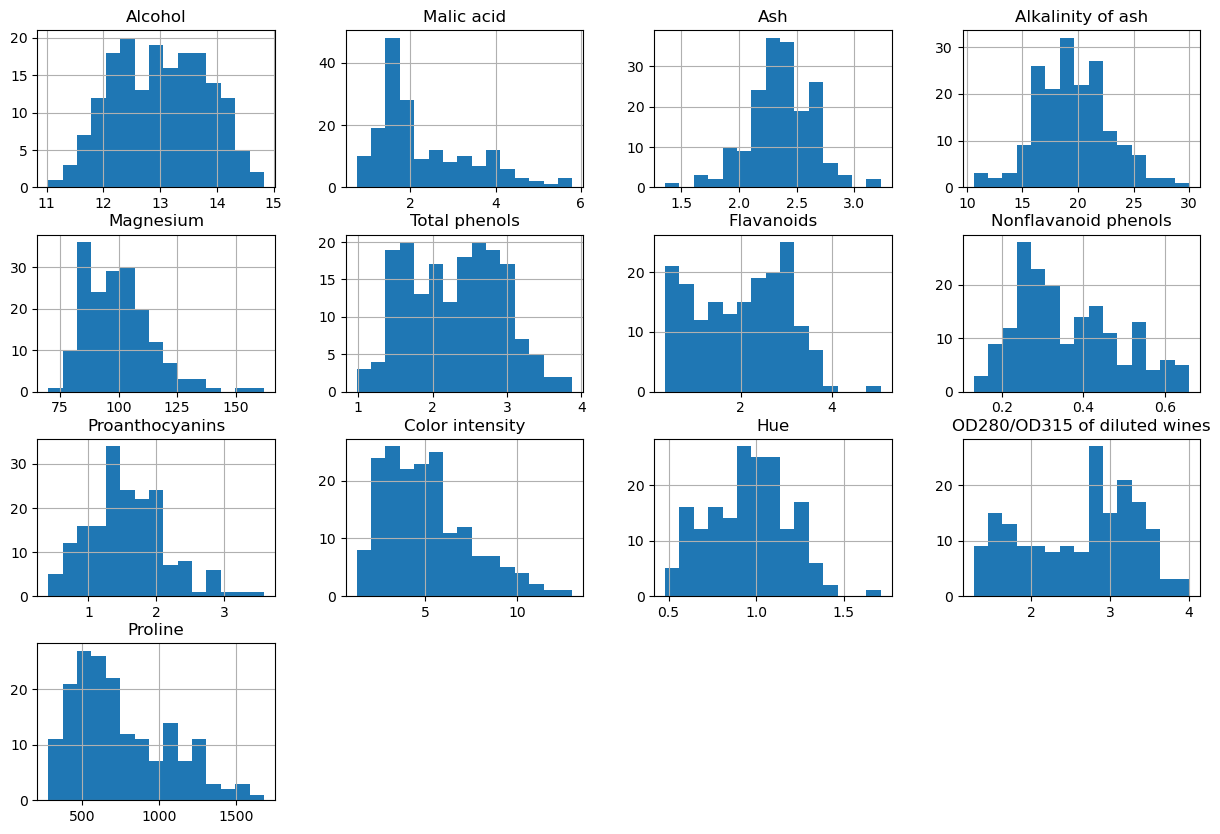

In [15]:
wine_data.drop(['Class'], axis=1).hist(bins=15, figsize=(15, 10))
plt.show()

¿Hay outliers? Para visualizarlo, hagamos un boxplot complementando lo anterior.

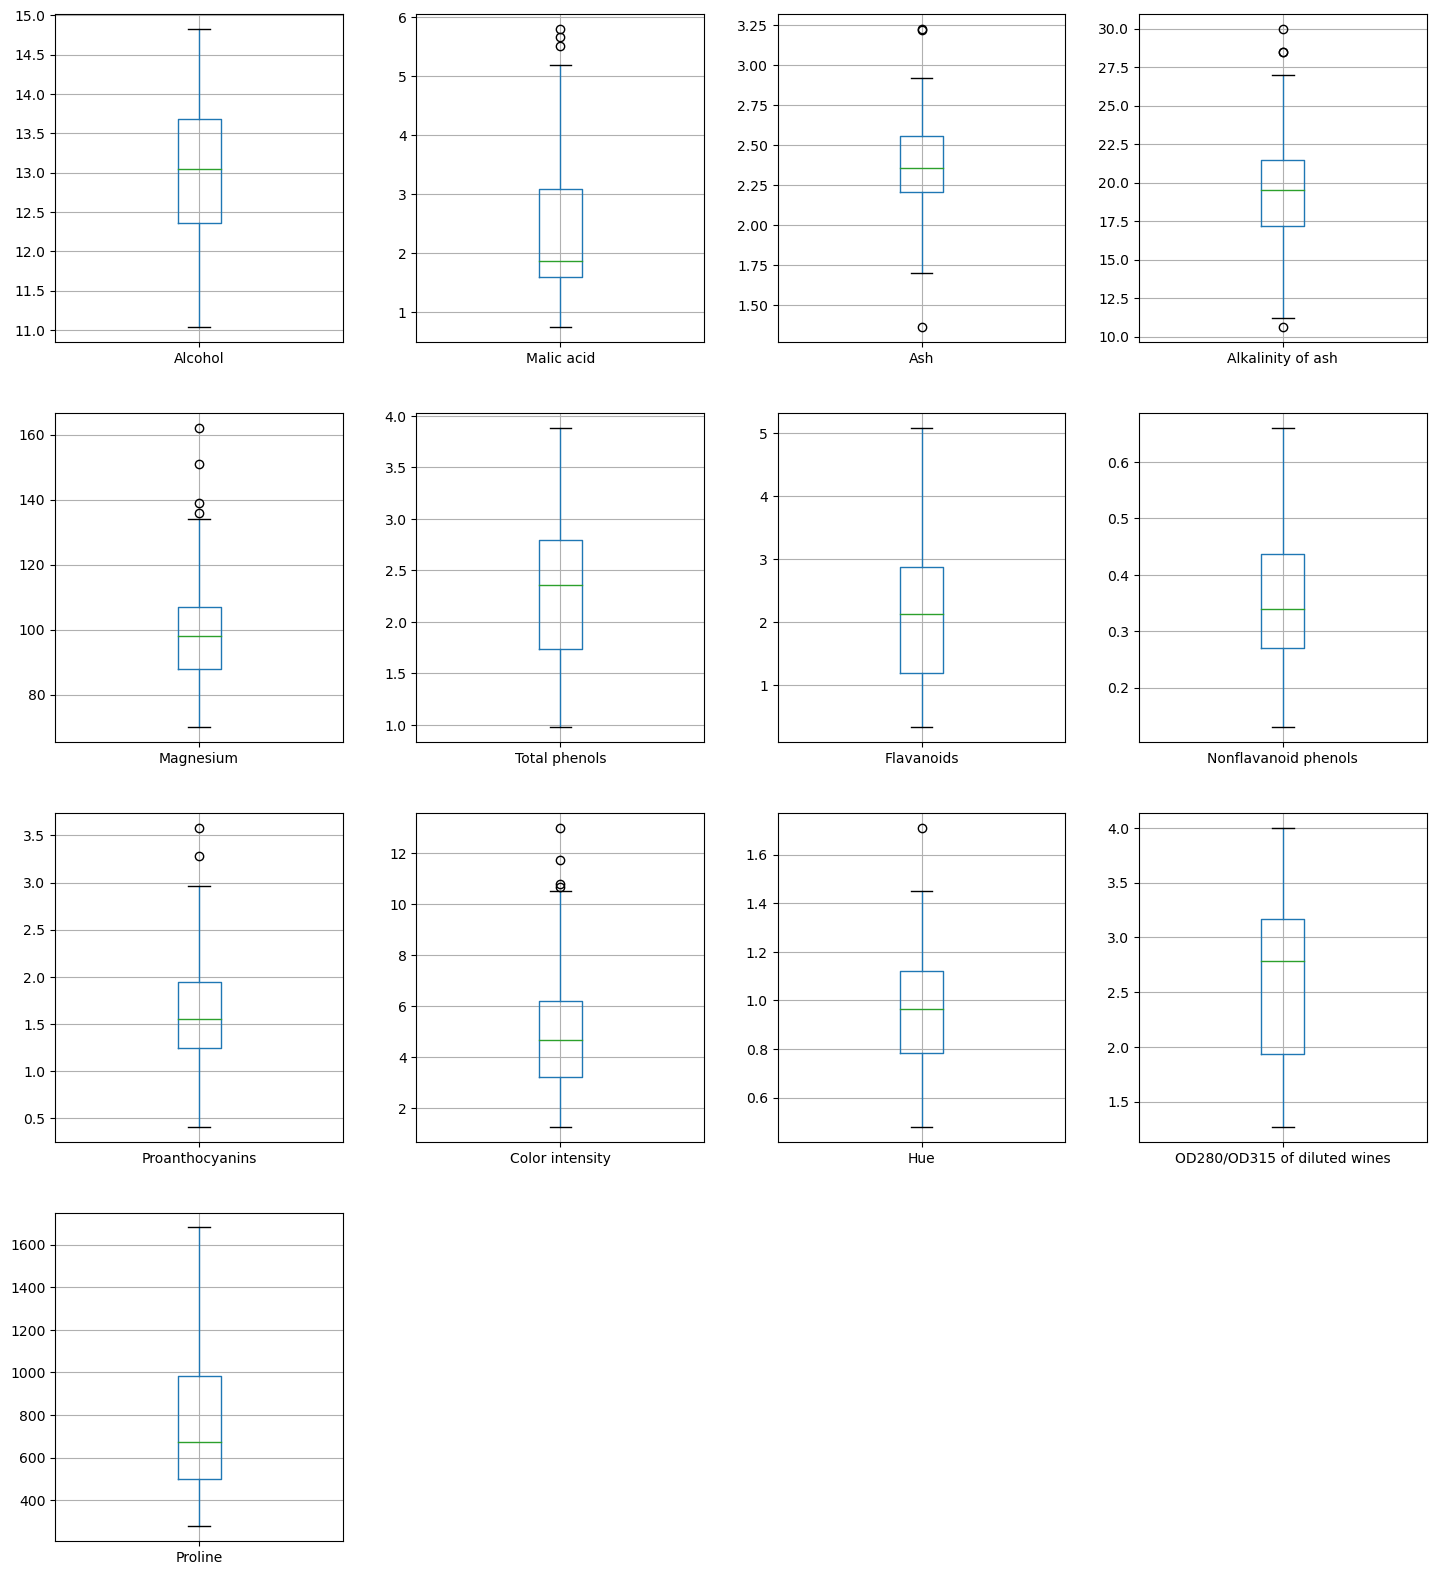

In [16]:
# Number of columns for the subplot grid
num_cols = 4

# Total number of variables (menos el target, "Class")
num_variables = len(wine_data.drop(['Class'], axis=1))

# Calculate the number of rows needed
num_rows = (num_variables + num_cols - 1) // num_cols  # Ceiling division

# Adjust figure size
fig_height_per_row = 4  # Adjust this based on trial and error
fig_width = 15
plt.figure(figsize=(fig_width, fig_height_per_row * num_rows))

# Loop through each column and create a subplot
for i, column in enumerate(wine_data.drop(['Class'], axis=1).columns):
    plt.subplot(num_rows, num_cols, i+1)
    wine_data[[column]].boxplot()

# Adjust subplot spacing and apply tight layout with padding
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()

De lo anterior vemos que las variables más normales son "Alcohol", "Ash", "Alkalinity of ash" y "Hue".
El resto de variables tienen cierto sesgo o skewness y/o simplemente no siguen una distribución normal.
Hay outliers relevantes en 'Malic acid', 'Magnesium', 'Color intensity', y menos (por lo tanto con menos impacto) en alguna otra variable como "Proanthocyanins".

Vamos a confirmar mediante el test de Shapiro si aquellas que visualmente parecen normales en efecto lo son:

In [17]:
for column in wine_data.columns:
    print(wine_data[column])

1    14.23
1    13.20
1    13.16
1    14.37
1    13.24
     ...  
3    13.71
3    13.40
3    13.27
3    13.17
3    14.13
Name: Alcohol, Length: 178, dtype: float64
1    1.71
1    1.78
1    2.36
1    1.95
1    2.59
     ... 
3    5.65
3    3.91
3    4.28
3    2.59
3    4.10
Name: Malic acid, Length: 178, dtype: float64
1    2.43
1    2.14
1    2.67
1    2.50
1    2.87
     ... 
3    2.45
3    2.48
3    2.26
3    2.37
3    2.74
Name: Ash, Length: 178, dtype: float64
1    15.6
1    11.2
1    18.6
1    16.8
1    21.0
     ... 
3    20.5
3    23.0
3    20.0
3    20.0
3    24.5
Name: Alkalinity of ash, Length: 178, dtype: float64
1    127.0
1    100.0
1    101.0
1    113.0
1    118.0
     ...  
3     95.0
3    102.0
3    120.0
3    120.0
3     96.0
Name: Magnesium, Length: 178, dtype: float64
1    2.80
1    2.65
1    2.80
1    3.85
1    2.80
     ... 
3    1.68
3    1.80
3    1.59
3    1.65
3    2.05
Name: Total phenols, Length: 178, dtype: float64
1    3.06
1    2.76
1    3.24
1    3.49
1  

In [18]:
gaussian_columns = []
# Test de normalidad de Shapiro-Wilk
for column in wine_data.drop("Class", axis=1).columns:
    print(column)
    stat, p = shapiro(wine_data[column])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:  # Con nivel de significación 0,05: si p está por encima de 0,05 probablemente SÍ tenemos distribución gaussiana (a.k.a. normal).
        gaussian_columns.append(column)
        print('Probably Gaussian\n')
    else:
        print('Probably not Gaussian\n')  # Con nivel de significación 0,05: si p está por debajo de 0,05 probablemente NO tenemos distribución normal o gaussiana.
    # Nota: ejemplo adaptado de:  https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

Alcohol
stat=0.982, p=0.020
Probably not Gaussian

Malic acid
stat=0.889, p=0.000
Probably not Gaussian

Ash
stat=0.984, p=0.039
Probably not Gaussian

Alkalinity of ash
stat=0.990, p=0.264
Probably Gaussian

Magnesium
stat=0.938, p=0.000
Probably not Gaussian

Total phenols
stat=0.977, p=0.004
Probably not Gaussian

Flavanoids
stat=0.955, p=0.000
Probably not Gaussian

Nonflavanoid phenols
stat=0.963, p=0.000
Probably not Gaussian

Proanthocyanins
stat=0.981, p=0.014
Probably not Gaussian

Color intensity
stat=0.940, p=0.000
Probably not Gaussian

Hue
stat=0.981, p=0.017
Probably not Gaussian

OD280/OD315 of diluted wines
stat=0.945, p=0.000
Probably not Gaussian

Proline
stat=0.931, p=0.000
Probably not Gaussian



In [19]:
gaussian_columns

['Alkalinity of ash']

Por lo tanto, para escalar las variables, nos interesará hacer lo siguiente:

-StandardScaler para normal: "Alkalinity of ash".
    
-Robust scaler para no normales con outliers: "Malic acid", "Magnesium", "Proanthocyanins" y "Color intensity".
    
-MinMax scaler para no normales sin outliers: "Alcohol", "Ash", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Hue", "OD280/OD315 of diluted wines" y "Proline".

No tenemos categóricas en este dataset salvo por la variable target, "Class", referida al tipo de vino (A, B, o C).

In [20]:
# Creamos dataframe con variables predictoras:
X = wine_data.drop('Class', axis=1)

# Creamos dataframe con variable "target":
Y = wine_data.Class

# Ejercicio 1

Crear al menos dos modelos de clasificación para predecir la clase del vino.

Necesitaremos separar las variables X, Y en subsets "train" y "test".

In [21]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Selecciono (arbitrariamente) dos modelos de clasificación: SVM (Support Vector Machine), y regresión logística. Podemos hacerlo mediante un pipeline. En dicho pipeline aplicaremos las transformaciones que hemos decidido antes en cuanto a 

Ahora podemos establecer un "pipeline" en que se apliquen los cambios de escala, etc. a los diferentes datos y que luego éstos vayan al modelizado correspondiente (ya sea la regresión logística o el SVM).

Auto-comentario: al parecer es buena práctica comprobar si hay NaN, u otros pre-procesados "básicos" antes del pipeline, mientras que el escalado en sí es buena práctica hacerlo durante el pipeline ya utilizando datos que han sido separados en train y test (parece ser que está relacionado con "Data leakage".

In [22]:
estandarizacion = [ "Alkalinity of ash"]
robust = ["Malic acid", "Magnesium", "Proanthocyanins", "Color intensity"]
minmax = ["Alcohol", "Ash", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Hue", "OD280/OD315 of diluted wines", "Proline"]

In [23]:
# Componente "transformer" para aplicar en un pipeline a las columnas del dataframe:
escalado = ColumnTransformer(
    transformers = [
        ('std', StandardScaler(), estandarizacion),
        ('robust', RobustScaler(), robust),
        ('minmax', MinMaxScaler(), minmax)
    ])


# Modelo de Regresión Logística   [TÉCNICAMENTE NO SERÍA CLASIFICACIÓN LOGÍSTICA?]
logistic_pipeline = Pipeline([
    ('preprocesado', escalado),
    ('modelo', LogisticRegression())  # La palabra "modelo__" será un prefijo que añadir al hacer el grid_search sobre el pipeline.
]  # VER PASO NÚMERO..... EL NÚMERO DE PASO QUE SEA!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
)


# Modelo SVM (concretamente clasificador SVC)
svm_pipeline = Pipeline([
    ('preprocesado', escalado),
    ('modelo', SVC())   # La palabra "modelo__" será un prefijo que añadir al hacer el grid_search sobre el pipeline.
])


In [24]:
logistic_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['Alkalinity of ash']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Ash',
                                                   'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'Hue',
                                                   'OD280/OD315 of diluted '
                                                   'wines',
                                                   'Proline'])])),
                ('modelo', LogisticRegression())])

In [25]:
svm_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['Alkalinity of ash']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Ash',
                                                   'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'Hue',
                                                   'OD280/OD315 of diluted '
                                                   'wines',
                                                   'Proline'])])),
                ('modelo', SVC())])

In [26]:
logistic_pred = logistic_pipeline.predict(X_test)

In [27]:
svm_pred = svm_pipeline.predict(X_test)

A simple vista se ve un importante solapamiento entre las predicciones de ambos modelos. Ver en el siguiente apartado la matriz de confusión, que muestra cómo SVM está funcionando mejora que la regresión logística.

In [28]:
logistic_pred

array(['0', '0', '2', '0', '1', '0', '1', '2', '1', '2', '1', '2', '0',
       '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '2', '2', '2',
       '1', '1', '1', '0', '0', '1', '2', '0', '0', '0', '2', '2', '1',
       '2', '0', '1', '1', '1', '2', '0', '1', '1', '2', '0', '1', '0',
       '0', '2'], dtype=object)

In [29]:
svm_pred

array(['0', '0', '2', '0', '1', '0', '1', '2', '1', '2', '1', '2', '0',
       '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '2', '2', '2',
       '1', '1', '1', '0', '0', '1', '2', '0', '0', '0', '1', '2', '1',
       '1', '0', '1', '1', '1', '2', '0', '1', '1', '2', '0', '1', '0',
       '0', '2'], dtype=object)

# Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [30]:
# Evaluación Regresión Logística
print("Regresión logística:")
print("Accuracy (\"exactitud\"):", accuracy_score(Y_test, logistic_pred))
cm_logistic = confusion_matrix(Y_test, logistic_pred)
print("Confusion Matrix:\n", cm_logistic)
print("Classification Report:\n", classification_report(Y_test, logistic_pred))

# Separador
print("-" * 50)

# Evaluación SVM
print("SVM (clasificador SVC):")
print("Accuracy (\"exactitud\"):", accuracy_score(Y_test, svm_pred))
cm_SVM = confusion_matrix(Y_test, svm_pred)
print("Confusion Matrix:\n", cm_SVM)
print("Classification Report:\n", classification_report(Y_test, svm_pred))

Regresión logística:
Accuracy ("exactitud"): 0.9629629629629629
Confusion Matrix:
 [[18  1  0]
 [ 1 20  0]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54

--------------------------------------------------
SVM (clasificador SVC):
Accuracy ("exactitud"): 0.9444444444444444
Confusion Matrix:
 [[18  1  0]
 [ 0 21  0]
 [ 0  2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.88      1.00      0.93        21
           2       1.00      0.86      0.92        14

    accuracy                           0.94        54
   ma

Si nos fijamos en los valores de "accuracy" (a mi entender, traducible como "exactitud"), el modelo de regresión logística es mejor que el SVM, teniendo la regresión logística una accuracy de aprox. 0.963, y el SVC aprox. 0.945 de la regresión logística.

Si atendemos a los resultados del "Classification report", podemos añadir que la precisión (vinculada a una baja ratio de falsos positivos) y el "recall" (relacionado con la capacidad de detectar todos los positivos) también favorecen al modelo de regresió logística. 

A continuación representamos las matrices de confusión. Nos muestran como el modelo de regresión logística yerra asignando una predicción equivocada en dos ocasiones, mientras que SVM yerra en tres.

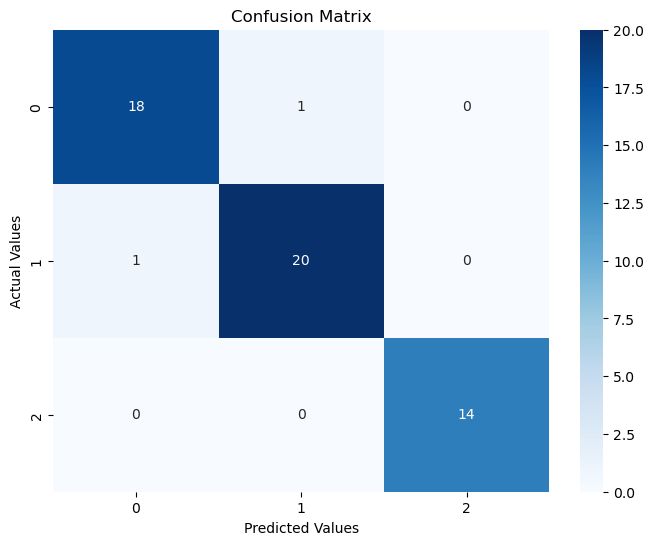

In [31]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

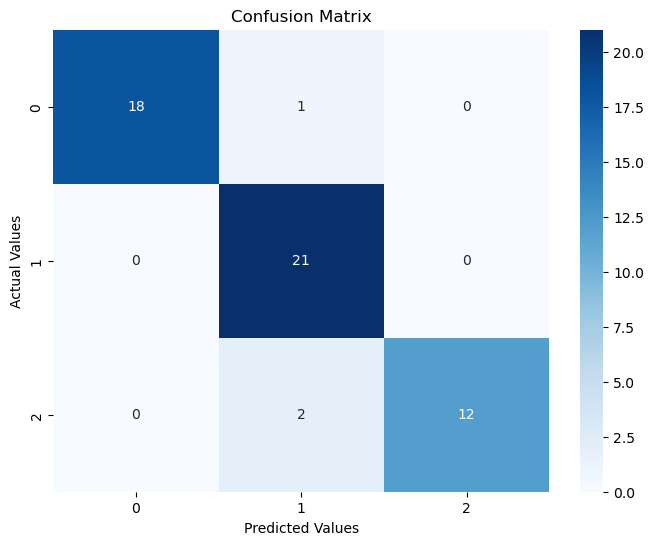

In [32]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Las matrices de confusión nos muestran como ambos modelos están clasificando correctamente la mayoría de vinos. Más en particular, nos muestra que el modelo de Regresión Logística es mejor que el de SVC (SVC se equivoca más, tres veces, en lugar de dos como la regresión logística).

# Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

En el caso de SVM (concretamente el clasificador SVC) podríamos explorar variaciones de entre -por ejemplo- los siguientes hiperparámetros:

In [33]:
# sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
# probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
# decision_function_shape='ovr', break_ties=False, random_state=None)

In [34]:
# Hiperparámetros SVM (clasificador SVC)
param_grid_SVM = {
    'modelo__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],   # Controlará la forma en que se manejan las variables input
    'modelo__degree' : [3, 4],   # Grado del polinomio (en caso de usar "poly")
    'modelo__C' : [50, 10, 1.0, 0.1, 0.01],    # Parámetro de regularización, que juega un rol en evitar el "overfitting". Se recomienda que estén espaciados un orden de magnitud (i.e. logarítmicamente).
    'modelo__gamma' : ['scale']   # Un hiperparámetro que se usa en kernels no lineales como "rbf", "poly" o "sigmoid". 'scale' equivale al antiguo 'auto'.
}

In [35]:
grid_search_SVM = GridSearchCV(estimator=svm_pipeline, param_grid=param_grid_SVM, cv=5, n_jobs=4, verbose=50)
grid_search_SVM.fit(X_train, Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesado',
                                        ColumnTransformer(transformers=[('std',
                                                                         StandardScaler(),
                                                                         ['Alkalinity '
                                                                          'of '
                                                                          'ash']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Malic '
                                                                          'acid',
                                                                          'Magnesium',
                                                                          'Proanthocyanins',
                                                                          'Color '
                                                                          'intensity']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['Alcohol',
                                                                          'Ash',
                                                                          'Total '
                                                                          'phenols',
                                                                          'Flavanoids',
                                                                          'Nonflavanoid '
                                                                          'phenols',
                                                                          'Hue',
                                                                          'OD280/OD315 '
                                                                          'of '
                                                                          'diluted '
                                                                          'wines',
                                                                          'Proline'])])),
                                       ('modelo', SVC())]),
             n_jobs=4,
             param_grid={'modelo__C': [50, 10, 1.0, 0.1, 0.01],
                         'modelo__degree': [3, 4], 'modelo__gamma': ['scale'],
                         'modelo__kernel': ['linear', 'poly', 'rbf',
                                            'sigmoid']},
             verbose=50)

In [36]:
# ¿Cuáles son los mejores hiperparámetros?
print("Best parameters:", grid_search_SVM.best_params_)

Best parameters: {'modelo__C': 1.0, 'modelo__degree': 3, 'modelo__gamma': 'scale', 'modelo__kernel': 'rbf'}


Ahora, para la regresión logística:

In [37]:
param_grid_logistico = {
    'modelo__solver' : ['newton-cg', 'lbfgs', 'liblinear'],    # Algoritmo utilizado.
    'modelo__penalty' : ['none', 'l1', 'l2', 'elasticnet'],   # Aproximación seguida para aplicar penalización y evitar overfitting.
    'modelo__C' : [100, 10, 1.0, 0.1, 0.01],    # Valores de penalización ("parámetro de regularización").
    'modelo__max_iter': [5000]   # Número máximo de iteraciones. Nota: con el valor por defecto algún algoritmo 
}

In [38]:
# ADAPTAR A: logistic_pipeline

grid_search_logistico = GridSearchCV(estimator=logistic_pipeline, param_grid=param_grid_logistico, cv=5, n_jobs=4, verbose=50)
grid_search_logistico.fit(X_train, Y_train)

# Nota: al ejecutarlo aparecen errores relacionados con incompatibilidades con ciertos "solvers". Los ignoramos.

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\karel\anaconda3\envs\py3.8.13\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\karel\anaconda3\envs\py3.8.13\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\karel\anaconda3\envs\py3.8.13\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\karel\anaconda3\envs\py3.8.13\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesado',
                                        ColumnTransformer(transformers=[('std',
                                                                         StandardScaler(),
                                                                         ['Alkalinity '
                                                                          'of '
                                                                          'ash']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Malic '
                                                                          'acid',
                                                                          'Magnesium',
                                                                          'Proanthocyanins',
                                                                          'Color '
                                                                          'intensity']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['Alcohol',
                                                                          'Ash',
                                                                          'Total '
                                                                          'phenols',
                                                                          'Flavanoids',
                                                                          'Nonflavanoid '
                                                                          'phenols',
                                                                          'Hue',
                                                                          'OD280/OD315 '
                                                                          'of '
                                                                          'diluted '
                                                                          'wines',
                                                                          'Proline'])])),
                                       ('modelo', LogisticRegression())]),
             n_jobs=4,
             param_grid={'modelo__C': [100, 10, 1.0, 0.1, 0.01],
                         'modelo__max_iter': [5000],
                         'modelo__penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'modelo__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=50)

In [39]:
# ¿Cuáles son los mejores hiperparámetros?
print("Best parameters:", grid_search_logistico.best_params_)

Best parameters: {'modelo__C': 100, 'modelo__max_iter': 5000, 'modelo__penalty': 'l2', 'modelo__solver': 'liblinear'}


En conclusión, después de entrenarlos repetidamente mendiante sendos "grids" de hiperparámetros, obtenemos que los mejores son:

Para la regresión SVM (clasificador SVC):
Best parameters: {'modelo__C': 1.0, 'modelo__degree': 3, 'modelo__gamma': 'scale', 'modelo__kernel': 'rbf'}
    
Para el regresor logístico:  
Best parameters: {'modelo__C': 100, 'modelo__max_iter': 5000, 'modelo__penalty': 'l2', 'modelo__solver': 'liblinear'}

Actualizamos cada pipeline con los parámetros correspondientes (hasta el momento, cada uno usaba los valores por defecto).

In [48]:
svm_pipeline.set_params(modelo__C = 1.0, 
                        modelo__degree = 3,
                        modelo__gamma = 'scale',
                        modelo__kernel = 'rbf')

Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['Alkalinity of ash']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Ash',
                                                   'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'Hue',
                                                   'OD280/OD315 of diluted '
                                                   'wines',
                                                   'Proline'])])),
                ('modelo', SVC())])

In [49]:
print(svm_pipeline)

Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['Alkalinity of ash']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Ash',
                                                   'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'Hue',
                                                   'OD280/OD315 of diluted '
                                  

In [50]:
logistic_pipeline.set_params(modelo__C=100, 
                             modelo__max_iter=5000, 
                             modelo__penalty='l2', 
                             modelo__solver='liblinear')

Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['Alkalinity of ash']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Ash',
                                                   'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'Hue',
                                                   'OD280/OD315 of diluted '
                                                   'wines',
                                                   'Proline'])])),
                ('modelo',
                 LogisticRegression(C=100, max_iter=5000, solver='liblinear'))])

In [51]:
print(logistic_pipeline)

Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['Alkalinity of ash']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Ash',
                                                   'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'Hue',
                                                   'OD280/OD315 of diluted '
                                  

# Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [54]:
# Perform cross-validation using R² as the scoring metric
svm_scores = cross_val_score(svm_pipeline, X, Y, cv=5, scoring='r2')

# Print the R² scores and their mean and standard deviation
print("Cross-validation R² scores:", svm_scores)
# Assuming these variables are defined with their respective values
svm_scores_mean = svm_scores.mean()
svm_scores_deviation = svm_scores.std()
print("Mean R² score:", svm_scores_mean)
print("Standard deviation:", svm_scores_deviation)

Cross-validation R² scores: [0.90862944 0.95431472 0.81725888 0.95179063 1.        ]
Mean R² score: 0.9263987358588188
Standard deviation: 0.06175508402679888


Al correr el código superior, vemos que hay algún "fold" en el cual la regresión SVM (clasificador SVC) lo hace perceptiblemente peor en uno de los folds, llegando a bajar a casi un "score" R^2 de 0.8.

In [55]:
# Perform cross-validation using R² as the scoring metric
logistic_scores = cross_val_score(logistic_pipeline, X, Y, cv=5, scoring='r2')

# Print the R² scores and their mean and standard deviation
print("Cross-validation R² scores:", logistic_scores)
logistic_scores_mean = logistic_scores.mean()
logistic_scores_deviation = logistic_scores.std()
print("Mean R² score:", logistic_scores_mean)
print("Standard deviation:", logistic_scores_deviation)

Cross-validation R² scores: [0.86294416 0.95431472 0.95431472 1.         1.        ]
Mean R² score: 0.9543147208121827
Standard deviation: 0.05004571591417764


Los scores son mayores en la regresión logística que en el caso del SVM, así como menos dispersos.

(0.8, 1.0)

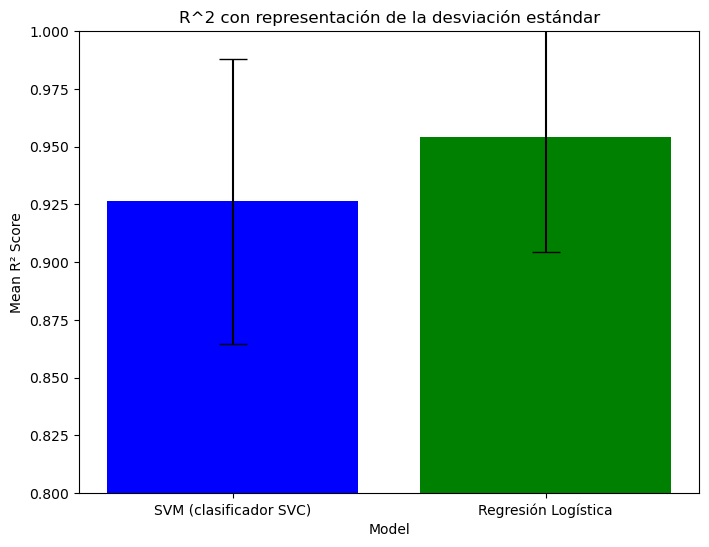

In [57]:
modelos = ['SVM (clasificador SVC)', 'Regresión Logística']
score_medio = [svm_scores_mean, logistic_scores_mean]
desvest = [svm_scores_deviation, logistic_scores_deviation]

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(modelos, score_medio, yerr=desvest, capsize=10, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean R² Score')
plt.title('R^2 con representación de la desviación estándar')
plt.ylim(0.8, 1)  # Set y-axis limits for better visualization

Podemos ver que el modelo de regresión logística, al tener tanto un score (R^2) promedio más alto, como además una desviación estándar menor (i.e. el método será más reproducible, más fiable).

Conclusión: nos quedamos con la regresión logística.

# Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [ ]:
# (Esto ya se ha hecho al inicio, y se ha incorporado a sendos pipelines: svm_pipeline y logistic_pipeline)